In [ ]:
# Run this cell for the rest of the notebook to work. You don't need to understand its content at this point

import numpy as np
import pandas
pandas.set_option('display.max_rows', 30)
np.set_printoptions(threshold=50)

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import seaborn

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Pour éviter les problèmes de chemin de ficher
import os
notebook_path = os.path.abspath("")

path_data = os.path.join(".", "assets", "data")

# Cours 1 : « Faire parler les données »

Sommaire
1. Introduction : exemple des textes de romans classiques
2. Manipulation et description des données
3. Visualisation des données

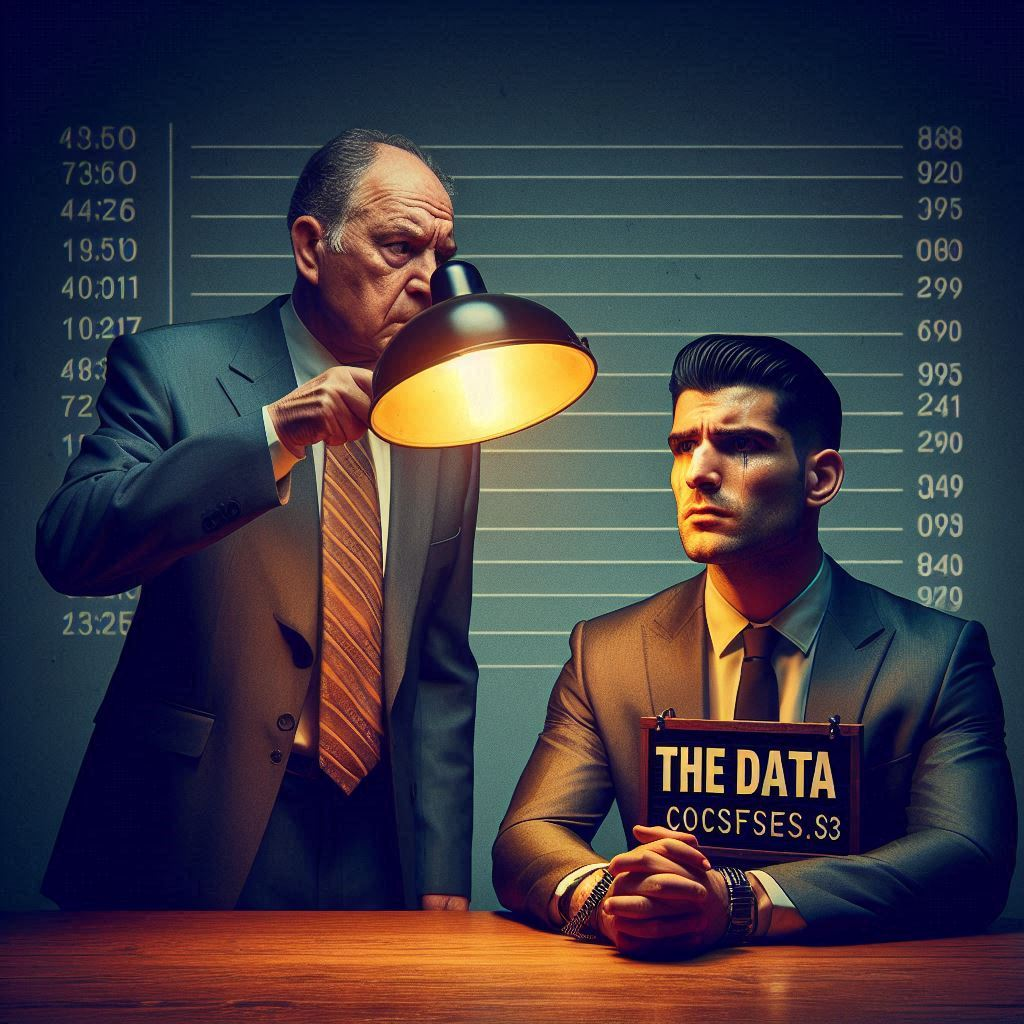

In [159]:
from IPython.display import Image
Image(filename=notebook_path + '/images/faire_parler_les_données.jpg', width=500)

(Image générée avec DALL.E 3)

## 1. Introduction : exemple des textes de romans classiques (20min)

In [ ]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [ ]:
# Display the chapters of Huckleberry Finn in a table.

pandas.DataFrame({'Chapters' : huck_finn_chapters})

### Personnages littéraires

In [ ]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = pandas.DataFrame({
        'Jim' : np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom' : np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck' : np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
})

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

counts['Chapter'] = np.arange(1, 44, 1)

fig = counts.plot(x='Chapter')
t = fig.set_title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
# The chapters of Little Women, in a table
pandas.DataFrame({'Chapters' : little_women_chapters})

In [ ]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = pandas.DataFrame({
        'Amy' : np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth' : np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo' : np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg' : np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie' : np.cumsum(np.char.count(little_women_chapters, 'Laurie'))
})

# Plot the cumulative counts.

counts['Chapter'] = np.arange(1, 48, 1)
fig = counts.plot(x="Chapter")
t = fig.set_title('Cumulative Number of Times Each Name Appears', y=1.08)

Laurie est un jeune homme qui épouse l'une des filles à la fin. Essayez de deviner laquelle en observant attentivement le graphique ci-dessus.

### Nombres de caractères

In [ ]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = pandas.DataFrame({
        'Chapter Length' : [len(s) for s in huck_finn_chapters],
        'Number of Periods' : np.char.count(huck_finn_chapters, '.')
})
chars_periods_little_women = pandas.DataFrame({
        'Chapter Length' : [len(s) for s in little_women_chapters],
        'Number of Periods' : np.char.count(little_women_chapters, '.')
})

In [ ]:
chars_periods_huck_finn

In [ ]:
chars_periods_little_women

Vous pouvez constater que les chapitres de *Little Women* sont en général plus longs que ceux de *Huckleberry Finn*. Voyons si ces deux variables simples - la longueur et le nombre de points dans chaque chapitre - peuvent nous en dire plus sur les deux livres. Une façon d'y parvenir est de représenter les deux ensembles de données sur les mêmes axes.

Dans le graphique ci-dessous, un point correspond à chaque chapitre de chaque livre. Les points bleus correspondent à *Huckleberry Finn* et les points dorés à *Little Women*. L'axe horizontal représente le nombre de points et l'axe vertical le nombre de caractères.

In [ ]:
# Let's first assemble the two tables into one
chars_periods_huck_finn['Book'] = 'Huckleberry Finn'
chars_periods_little_women['Book'] = 'Little Women'
chars_periods_all = pandas.concat([chars_periods_huck_finn, chars_periods_little_women])

color_palette = seaborn.xkcd_palette(['darkblue', 'gold'])
fig = seaborn.relplot(data=chars_periods_all, kind='scatter', x='Number of Periods', y='Chapter Length', hue='Book',
                      height=6, aspect=1, palette = color_palette)
t = plots.xlabel('Number of periods in chapter')
t = plots.ylabel('Number of characters in chapter')

Le graphique nous montre que de nombreux chapitres de *Little Women*, mais pas tous, sont plus longs que ceux de *Huckleberry Finn*, comme nous l'avions observé en regardant simplement les chiffres. Mais il nous montre aussi quelque chose de plus. Remarquez que les points bleus sont grossièrement regroupés autour d'une ligne droite, tout comme les points jaunes. De plus, il semble que les deux couleurs de points puissent être regroupées autour de la même ligne droite.

Maintenant, regardez tous les chapitres qui contiennent environ 100 points finaux. Le graphique montre que ces chapitres contiennent environ 10 000 à 15 000 caractères, en gros. Cela représente environ 100 à 150 caractères par point final.

En effet, il ressort de l'analyse de l'intrigue qu'en moyenne, les deux livres ont tendance à contenir entre 100 et 150 caractère par point final, à titre d'estimation très approximative. Peut-être ces deux grands romans du XIXe siècle annonçaient-ils quelque chose qui nous est si familier aujourd'hui : la limite de 140 caractères de X (ex-Twitter) ?

## 2. Manipulation et description des données (30min)

In [ ]:
cones = pandas.read_csv(os.path.join(path_data, 'cones.csv'))
nba = pandas.read_csv(os.path.join(path_data, 'nba_salaries.csv'))
nba = nba.rename(columns={"'15-'16 SALARY" : "SALARY"})
movies = pandas.read_csv(os.path.join(path_data, 'movies_by_year.csv'))

### Représentation des données sous forme de *tableaux* ou *DataFrames* : premiers pas avec la bibliothèque pandas en python

In [ ]:
cones

In [ ]:
cones.head(2)

In [ ]:
cones['Flavor']

In [ ]:
cones

In [ ]:
cones[['Flavor', 'Price']]

In [ ]:
cones.drop('Color', axis=1)

In [ ]:
no_colors = cones.drop('Color', axis=1)

no_colors

In [ ]:
cones.sort_values('Price')

In [ ]:
cones.sort_values('Price', ascending=False)

In [ ]:
cones[cones['Flavor'] == 'chocolate']

In [ ]:
cones['Flavor'] == 'chocolate'

In [ ]:
cones[cones['Flavor'] == 'Chocolate']

In [ ]:
import pandas

In [ ]:
df = pandas.DataFrame()
df

In [ ]:
df['Number of petals'] = [8, 34, 5]
df

In [ ]:
flowers = pandas.DataFrame()
flowers['Number of petals'] = [8, 34, 5]
flowers['Name'] = ['lotus', 'sunflower', 'rose']
flowers['Color'] = ['pink', 'yellow', 'red']

flowers

In [ ]:

flowers_dict = {'Number of petals' : [8, 34, 5],
                'Name' : ['lotus', 'sunflower', 'rose'],
                'Color' : ['pink', 'yellow', 'red']
}

flowers = pandas.DataFrame(flowers_dict)
flowers

In [ ]:
minard = pandas.read_csv(os.path.join(path_data, 'minard.csv'))
minard

In [ ]:
len(minard.columns)

In [ ]:
len(minard)

In [ ]:
minard.columns

In [ ]:
minard.rename(columns={'City': 'City Name'})

In [ ]:
minard

In [ ]:
minard = minard.rename(columns={'City': 'City Name'})
minard

In [ ]:
minard['Survivors']

In [ ]:
minard.iloc[:,4]

In [ ]:
minard.iloc[0,4]

In [ ]:
minard['Survivors'][0]

In [ ]:
initial = minard['Survivors'][0]
minard['Percent Surviving'] = minard['Survivors']/initial
minard

In [ ]:
minard['Percent Surviving'] = minard['Percent Surviving'].map('{:,.2%}'.format)
minard

In [ ]:
minard[['Longitude', 'Latitude']]

In [ ]:
minard.iloc[:,[0, 1]]

In [ ]:
minard['Survivors']

In [ ]:
minard.drop(columns=['Longitude', 'Latitude', 'Direction'])

In [ ]:
minard

#### Exemple : Salaires dans la NBA

"La NBA est la ligue sportive professionnelle la mieux payée au monde", [a rapporté CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) en mars 2016. Le tableau `nba` contient les [salaires de tous les joueurs de la National Basketball Association](https://www.statcrunch.com/app/index.php?dataid=1843341) en 2015-2016.

Chaque ligne représente un joueur. Les colonnes sont :

| **Étiquette de la colonne** | Description                                           |
|-----------------------------|-------------------------------------------------------|
| `PLAYER`                    | Nom du joueur                                         |
| `POSITION`                  | Position du joueur dans l'équipe                      |
| `TEAM`                      | Nom de l'équipe                                       |
|`SALAIRE`                    | Salaire du joueur en 2015-2016, en millions de dollars|
 
Le code pour les positions est PG (Point Guard), SG (Shooting Guard), PF (Power Forward), SF (Small Forward), et C (Center). Mais ce qui suit n'implique pas de détails sur la façon dont le basket-ball est joué.

La première ligne montre que Paul Millsap, attaquant des Atlanta Hawks, a perçu un salaire de près de 18,7 millions de dollars en 2015-2016.

In [ ]:
nba

In [ ]:
nba[nba['PLAYER'] == 'Stephen Curry']

In [ ]:
warriors = nba[nba['TEAM'] == 'Golden State Warriors']
warriors

In [ ]:
nba.head(20)

In [ ]:
# This table can be found online: https://www.statcrunch.com/app/index.php?dataid=1843341
nba_salaries = pandas.read_csv(os.path.join(path_data, 'nba_salaries.csv'))
nba_salaries

In [ ]:
nba_salaries.head(5)

In [ ]:
nba.sort_values('PLAYER').head()

In [ ]:
nba.sort_values('SALARY')

In [ ]:
nba = nba_salaries.rename(columns={"'15-'16 SALARY": 'SALARY'})
nba.sort_values('SALARY')

In [ ]:
nba.sort_values('SALARY', ascending=False)

In [ ]:
help(nba.sort_values)

In [ ]:
nba

In [ ]:
nba.iloc[[0],]

In [ ]:
nba.iloc[np.arange(3, 6)]

In [ ]:
nba.sort_values('SALARY', ascending=False).iloc[np.arange(5)]

In [ ]:
nba[nba['SALARY'] > 10]

In [ ]:
nba[nba['SALARY'] > 10].sort_values('SALARY')

In [ ]:
nba[nba['PLAYER'] == 'Stephen Curry']

In [ ]:
print(nba[nba['TEAM'] == 'Golden State Warriors'])

In [ ]:
nba[(nba['POSITION'] == 'PG') & (nba["SALARY"] > 15)]

In [ ]:
nba[(10 <= nba['SALARY']) &  (nba['SALARY'] < 10.3)]

In [ ]:
nba[nba['PLAYER'] == 'Barack Obama']

In [ ]:
nba[nba['TEAM'].str.contains('Warriors')]

In [ ]:
nba[nba['POSITION'].str.contains('G')]

In [ ]:
other_than_Cavs = nba[nba['TEAM'] != 'Cleveland Cavaliers']
other_than_Cavs[~(other_than_Cavs['SALARY'] < 20)]

In [ ]:
other_than_Cavs[other_than_Cavs['SALARY'] >= 20]

In [ ]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [ ]:
cut_off_at_100(17)

In [ ]:
cut_off_at_100(117)

In [ ]:
cut_off_at_100(100)

In [ ]:
ages = pandas.DataFrame({
    'Person': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Age': [17, 117, 52, 100, 6, 101]
})
ages

In [ ]:
ages['Age'].apply(cut_off_at_100)

In [ ]:
ages['Cut Off Age'] = ages['Age'].apply(cut_off_at_100)
ages

### Regroupement et jonction

#### Regroupement

In [ ]:
cones = pandas.DataFrame({
    'Flavor': ['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'],
    'Price': [3.55, 4.75, 6.55, 5.25, 5.25]
})
cones

In [ ]:
cones.groupby('Flavor')

In [ ]:
groups = list(cones.groupby('Flavor'))

In [ ]:
group0, df0 = groups[0]
print(group0)
df0

In [ ]:
group1, df1 = groups[1]
print(group1)
df1

In [ ]:
cones.groupby('Flavor').agg("count")

In [ ]:
cones.groupby('Flavor').agg("mean")

In [ ]:
cones.groupby('Flavor').agg(nb_cones=("Price", "count"))

In [ ]:
cones.groupby('Flavor').agg(average_cone_price=("Price", "mean"))

In [ ]:
cones.groupby('Flavor').agg(nb_cones=("Price", "count")).reset_index()

In [ ]:
cones.groupby('Flavor').agg(Price_sum=("Price", "sum"))

In [ ]:
cones.groupby('Flavor').agg(nb_cones=("Flavor", "count"), Price_sum=("Price", "sum"))

In [ ]:
cones[cones['Flavor']=='chocolate']['Price']

In [ ]:
sum(cones[cones['Flavor']=='chocolate']['Price'])

In [ ]:
cones.groupby('Flavor').agg(Price_max=('Price', sum))

In [ ]:
cones.groupby('Flavor').agg(Price_max=('Price', max))

In [ ]:
more_cones = pandas.DataFrame({
    'Flavor': ['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'],
    'Color': ['pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'],
    'Price': [3.55, 4.75, 5.25, 5.25, 5.25, 4.75]
})

more_cones

In [ ]:
more_cones.groupby('Flavor').agg(nb_cones=("Flavor","count"))

In [ ]:
more_cones.groupby(['Flavor', 'Color']).agg(nb_cones=("Flavor","count"))

In [ ]:
more_cones.groupby(['Flavor', 'Color']).agg(nb_cones=("Flavor","count")).reset_index()

In [ ]:
more_cones.groupby(['Flavor', 'Color']).agg(sum_price=("Price","sum"))

#### Jonction

In [ ]:
cones = pandas.DataFrame({
    'Flavor': ['strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'],
    'Price': [3.55, 4.75, 6.55, 5.25, 5.75]
})
cones

In [ ]:
ratings = pandas.DataFrame({
    'Kind': ['strawberry', 'chocolate', 'vanilla'],
    'Stars': [2.5, 3.5, 4]
})
ratings

In [ ]:
rated = pandas.merge(cones, ratings, left_on="Flavor", right_on="Kind")
rated

In [ ]:
rated = rated.drop(columns=["Kind"])
rated

In [ ]:
rated['$/Star'] = rated['Price'] / rated['Stars']
rated.sort_values('$/Star')

In [ ]:
pandas.merge(ratings, cones, left_on="Kind", right_on="Flavor")

In [ ]:
reviews = pandas.DataFrame({
    'Flavor': ['vanilla', 'chocolate', 'vanilla', 'chocolate'],
    'Stars': [5, 3, 5, 4]
})
reviews

In [ ]:
average_review = reviews.groupby('Flavor').agg(mean_stars=("Stars", "mean"))
average_review

In [ ]:
pandas.merge(cones, average_review, left_on="Flavor", right_on="Flavor")

## 3. Visualisation des données (30min)

### Diagrammes de dispersion

In [ ]:
actors = pandas.read_csv(os.path.join(path_data, 'actors.csv'))
actors

In [ ]:
fig = seaborn.relplot(data=actors, x='Number of Movies', y='Total Gross', aspect=1.5)

In [ ]:
fig = seaborn.relplot(data=actors, x='Number of Movies', y='Average per Movie', aspect=1.5)

In [ ]:
no_outlier = actors[actors['Number of Movies'] > 10]
fig = seaborn.relplot(data=no_outlier, x='Number of Movies', y='Average per Movie', aspect=1.5)

In [ ]:
actors[actors['Number of Movies'] > 60]

In [ ]:
actors[actors['Number of Movies'] < 10]

### Graphiques linéaires

In [ ]:
movies_by_year = pandas.read_csv(os.path.join(path_data, 'movies_by_year.csv'))
movies_by_year

In [ ]:
fig = seaborn.relplot(data=movies_by_year, x='Year', y='Number of Movies', kind="line", aspect=1.5)

In [ ]:
century_21 = movies_by_year[movies_by_year['Year'] > 1999]

In [ ]:
fig = seaborn.relplot(data=century_21, x='Year', y='Number of Movies', kind="line", aspect=1.5)

In [ ]:
fig = seaborn.relplot(data=century_21, x='Year', y='Total Gross', kind="line", aspect=1.5)

In [ ]:
century_21[century_21['Year'] == 2009]

### Diagramme à barres

In [ ]:
icecream = pandas.DataFrame({
    'Flavor': ['Chocolate', 'Strawberry', 'Vanilla'],
    'Number of Cartons': [16, 5, 9]
})
icecream

In [ ]:
fig = seaborn.catplot(data=icecream, x='Number of Cartons', y='Flavor', kind="bar", aspect=1.5)

In [ ]:
fig = seaborn.catplot(data=icecream, x='Number of Cartons', y='Flavor', kind="bar",
                      aspect=1.5, order=["Chocolate", "Vanilla", "Strawberry"])

In [ ]:
top = pandas.read_csv(os.path.join(path_data, 'top_movies_2017.csv'))
top

In [ ]:
movies_and_studios = top[['Title', 'Studio']]

In [ ]:
studio_distribution = movies_and_studios.groupby('Studio', as_index=False).agg(nb_movies=("Studio","count"))
studio_distribution

In [ ]:
sum(studio_distribution['nb_movies'])

In [ ]:
fig = seaborn.catplot(data=studio_distribution.sort_values('nb_movies', ascending=False),
                      x='nb_movies', y='Studio',
                      kind="bar", aspect=1.5)

### Histogrammes

In [ ]:
top = pandas.read_csv(os.path.join(path_data, 'top_movies_2017.csv'))
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
# top.style.format(thousands=" ", subset=["Gross", "Gross (Adjusted)"])
top

In [ ]:
millions = top.loc[:, ["Title"]]
millions["Adjusted Gross"] = np.round(top["Gross (Adjusted)"]/1e6, 2)
millions

In [ ]:
adj_gross = millions['Adjusted Gross']
min(adj_gross), max(adj_gross)

In [ ]:
millions_bin = millions.assign(bin=pandas.cut(millions['Adjusted Gross'], bins=np.arange(300,2001,100)))
millions_bin

In [ ]:
bin_counts = millions_bin.groupby("bin").agg(nb_movies=("bin", "count"))
bin_counts

In [ ]:
millions_bin = millions.assign(bin=pandas.cut(millions['Adjusted Gross'], bins=4))
millions_bin.groupby("bin").agg(nb_movies=("bin", "count"))

In [ ]:
fig = seaborn.displot(data=millions, x='Adjusted Gross', stat="density", aspect=1.5, bins=10, kind='hist')
t = fig.axes[0,0].set(xlabel="Adjusted Gross (in million $)")

In [ ]:
fig = seaborn.displot(data=millions, x='Adjusted Gross', bins=np.arange(300,2001,100), stat="density", aspect=1.5)
t = fig.axes[0,0].set(xlabel="Adjusted Gross (in million $)")

#### Le principe de l'aire ##

![Batteries iPad](images/ipad_battery.png)


#### L'histogramme : Principes généraux et calcul

Les histogrammes suivent le principe de l'aire et ont deux propriétés déterminantes :

1. Les cases sont dessinées à l'échelle et sont contiguës (bien que certaines puissent être vides), car les valeurs sur l'axe horizontal sont numériques et ont donc des positions fixes sur la ligne des nombres.
2. La **surface** de chaque barre est proportionnelle au nombre d'entrées dans la case.

La propriété 2 est la clé du dessin d'un histogramme et est généralement obtenue de la manière suivante :

$$
\mbox{surface de la barre} ~=~ \mbox{proportion d'entrées dans la case}
$$

Comme les surfaces représentent des proportions, les hauteurs représentent autre chose que des proportions ou pourcentages. Le calcul numérique des hauteurs utilise simplement le fait que la barre est un rectangle :

$$
\mbox{surface de la barre} = \mbox{hauteur de la barre} \time \mbox{largeur du bac}
$$

et donc

$$
\mbox{hauteur de la barre} ~=~
\frac{\mbox{surface de la barre}}{\mbox{largeur du bac}} ~=~
\frac{\mbox{proportion d'entrées dans le bac}}{\mbox{largeur du bac}}
$$


Les unités de hauteur sont la "proportion par unité sur l'axe horizontal". La hauteur est la proportion d'entrées dans la case par rapport à la largeur de la case. On parle donc de *densité* ou de *peuplement*.

Lorsque l'histogramme est dessiné selon cette méthode, on dit qu'il est dessiné sur l'"échelle de densité". Sur cette échelle :
- La surface de chaque barre est égale à la proportion de valeurs de données qui se trouvent dans l'intervalle correspondant.
- La surface totale de toutes les barres de l'histogramme est de 1. En termes de pourcentages, on peut dire que la somme des surfaces de toutes les barres d'un histogramme est égale à 100%.

In [ ]:
bin_counts

L'emplacement (300, 400] contient 68 films. Cela représente 34 % de tous les films, soit une proportion de 0.34 :

$$
\mbox{Proportion} = \frac{68}{200} = 0.34
$$

La longeur de l'intervalle [300, 400] est de $400  - 300 = 100 $. Ainsi, la largeur de l'intervalle (300, 400] est de $400  - 300 = 100 $.

$$
\mbox{Hauteur} = \frac{0.34}{100} = 0.0034
$$

**Unités:** La hauteur de la barre est de 0.34 divisé par 100 millions de dollars, et la hauteur est donc de 0,0034 par million de dollars.

La hauteur de la barre n'est **ni** le pourcentage **ni** la proportion d'entrées dans l'intervalle. Il s'agit de la proportion d'entrées dans l'intervalle par rapport à l'espace disponible dans l'intervalle. C'est pourquoi la hauteur mesure l'encombrement ou la densité. On dit que l'axe vertical se situe sur l'échelle de densité.

#### Pourquoi ne pas simplement tracer les chiffres ?

In [ ]:
uneven = [300, 350, 400, 500, 1800]
fig = seaborn.displot(data=millions, x='Adjusted Gross', bins=uneven, stat="density", aspect=1.5)
t = fig.axes[0,0].set(xlabel="Adjusted Gross (in million $)")


In [ ]:
millions_bin =millions.assign(bin=pandas.cut(millions['Adjusted Gross'], bins=uneven))
millions_bin.groupby("bin").agg(nb_movies=("bin", "count"))

In [ ]:
uneven = [300, 350, 400, 500, 1800]
fig = seaborn.displot(data=millions, x='Adjusted Gross', bins=uneven, aspect=1.5)
t = fig.axes[0,0].set(xlabel="Adjusted Gross (in million $)")

### Graphiques superposés

#### Diagrammes de dispersion superposés

In [ ]:
sons_heights = pandas.read_csv(os.path.join(path_data,'sons_heights.csv'))
sons_heights

In [ ]:
sons_heights_father = sons_heights[['son', 'father']].rename(columns={"father": "parent"})
sons_heights_mother = sons_heights[['son', 'mother']].rename(columns={"mother": "parent"})
sons_heights_father['parent role'] = 'Father'
sons_heights_mother['parent role'] = 'Mother'
sons_heights_restructured = pandas.concat([sons_heights_father, sons_heights_mother])
sons_heights_restructured

In [ ]:
fig = seaborn.relplot(data=sons_heights_restructured, x='son', y='parent', hue="parent role", aspect=1.5)

#### Tracés superposés

In [ ]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = pandas.read_csv(data)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table[['SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019']]
us_pop = partial_census_table.rename(columns={'POPESTIMATE2014': '2014', 'POPESTIMATE2019': '2019'})

# Access the rows corresponding to all children, ages 0-18
children = us_pop[(us_pop["SEX"] == 0) & (us_pop['AGE'] < 19)].drop(columns="SEX")
children

In [ ]:
children_restructured = pandas.melt(children, id_vars="AGE", var_name="YEAR", value_name="NB Children")
children_restructured

In [ ]:
fig = seaborn.relplot(data=children_restructured, x='AGE', y='NB Children', hue="YEAR", aspect=1.5, kind="line")

#### Diagrammes à barres

In [ ]:
usa_ca = pandas.read_csv(os.path.join(path_data, 'usa_ca_2019.csv'))
usa_ca

In [ ]:
usa_ca_melted = pandas.melt(usa_ca, id_vars="Ethnicity/Race", var_name="Group", value_name="Percentage")
usa_ca_melted

In [ ]:
fig = seaborn.catplot(data=usa_ca_melted, x='Percentage', y='Ethnicity/Race', hue="Group",
                      aspect=1.5, kind="bar", orient='h')

In [ ]:
fig = seaborn.catplot(data=usa_ca_melted, x='Percentage', y='Group', hue="Ethnicity/Race",
                      aspect=1.5, kind="bar", orient='h')

In [ ]:
usa_ca_all = usa_ca_melted[usa_ca_melted['Group'].isin(['USA All', 'CA All'])]
fig = seaborn.catplot(data=usa_ca_all, x='Percentage', y='Ethnicity/Race', hue="Group",
                      aspect=1.5, kind="bar", orient='h')

In [ ]:
ca = usa_ca_melted[usa_ca_melted['Group'].isin(['CA All', 'CA Children'])]
fig = seaborn.catplot(data=ca, x='Percentage', y='Ethnicity/Race', hue="Group",
                      aspect=1.5, kind="bar", orient='h')

# Crédits

Ce cours est inspiré du cours data8 donné à UC Berkeley et en ré-utilise avec certaines modifications une partie des matériels (ces matériels sont généreusement mis à disposition publiquement sous licence Creative Commons avec attribution, consultez [https://www.data8.org](https://www.data8.org) pour plus d'informations.